# Monte Carlo methods - importance sampling

## Introduction - Monte Carlo methods
Method to approximate an integral - particularly useful when integral cannot be solved or is difficult to solve analytically. Monte Carlo methods provide a simulation based method to calculate estimates these *difficult to solve* integrals using *sampling methods*. Simply put, Monte Carlo methods create a large number of samples then subsequently tests these samples against a condition. The number of passes are then counted and divided by the total number of simulations. The result is our Monte Carlo estimate. To reinforce this concept, an example of estimating pi is provided: 



**Insert example of estimating pi ** 

In calculating the integral for pi, the Law of Large Numbers (LLN) has been applied. Note: LLN enforces that: 

$$ 
\int f(X) P(X) dx = E[f(X)] = \frac{1}{N}\sum^N_{i=1}h(X_i) 
$$
as
$$
 n \rightarrow \infty 
$$
Monte Carlo estimates are useful in calculation of *expected values* and the *higher order* moments pertaining to a distribution which can subsequently be used in method of moment estimation.

## Importance sampling basics/overview
Although vanilla Monte Carlo methods provide means to calculate difficult or intractable integrals they have flaws that importance sampling improves upon. In short importance sampling will only sampling regions of the domain where values are of *importance*, where *importance* is defined as having a significant impact on the integral being calculated.


One issue is that Monte Carlo methods can provide relatively high variance estimates especially when used to model rare events; importance sampling is able to reduce sample variance by focusing samples on known regions of interest. The crux if calculating the expected value of a distribution areas of both low probability and low absolute value should be deprioritised as such would have minimal bearing on the expected value calculation.

Three scenarios when importance sampling can be used to improve/produce simulated results: 
    
    1. To reduce variance in a Monte Carlo estimate
    2. When P(x) cannot be sampled from for the Monte Carlo estimate
    3. If a target density required for simulation is not *normalised* 
    
  
3. If a target density required for simulation is not *normalised*

In many inference problems you will want to determine properties, such as the mean, of a distribution where you only have knowledge of the unnormalized density. Such requirement generally arises in the field of Bayesian inference. 

## Derivations and mathematics
Use importance sampling when integral of interest is can not easily be approximated i.e. an expected value calculation. Taking an importance sampling approach provides efficiency is simulation by 'better approximating regions of interest. Importance sampling produces these *improved estimates* by both multiplying and dividing the target integral by a distribution easily sampled from. Again only distributions which share the same *domain support* as both f(X) and P(X) can be used. Mathematically, this equates to: 

$$ 
\int f(x)P(x) dx = \int f(X)\frac{P(X)}{Q(x)} Q(X) dx
$$

Where Q(x) is a distribution *easily* sampled from. Note: as the integrand has only been multiplied by $\frac{Q(X)}{Q(X)}$ the value of integral has not changed. What has changed is the interpretation; the left side of the equation is can be defined as $E[f(X)]$ where as the right is $E[f(X) \frac{P(X)}{Q(x)}]$

When calculating mean areas of both low probability and absolute value have little effect on the mean; therefor don't sample from this region.

In summary, a good importance sampling function h(x) should have the following properties:
1. h(x) > 0 whenever g(x) 6= 0
2. h(x) should be close to being proportional to |g(x)|
3. it should be easy to simulate values from h(x)
4. it should be easy to compute the density h(x) for any value x that you might realize.


## Limitations




## Implementations/code
To enforce the concept of importance sampling code snippets have been provided below. There are three implementations: 
1. Importance sampling to reduce variance of Monte Carlo estimates 
2. Calculating integral when P(x) cannot be sampled from
3. Calculation of unnormalised distribution (particularly important for Bayesian methods)

As a first example we will look at a case where importance sampling provides a reduction in the variance of an integral approximation. Consider the function 
$h(x) = 10exp (−2|x − 5|)$. Suppose that we want to calculate $E(h(X))$, where X ∼ Uniform(0, 1).
That is, we want to calculate the integral

$$
\int h(X)P(X) = \int^{10}_1 10 e^{−2|x − 5|} \frac{1}{10} dx = \int^{10}_1 e^{−2|x − 5|} dx
$$ 

The true value for this integral is about 1. The simple way to calculate this integral is to leverage the LLN; more explicitly to generate Xi from the uniform(0,10) density and look at the sample mean of 10 · h(Xi). The plot below shows the function, $h(X)$ in blue and sample distribution in red.

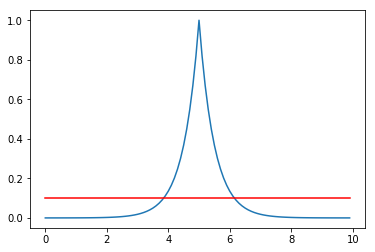

In [32]:
# 1. Importance sampling to reduce variance of Monte Carlo estimates 
import math
import matplotlib.pyplot as plt
import numpy as np
# Create data
x = [x/100 for x in range (0,1000,10)]
y = [math.exp(-2*abs(y-5)) for y in x] 
unif_density = [0.1 for _ in x]

# Plot; blue is the integrand red is the (uniform) distribution we sample from 
plt.plot(x,y)
plt.plot(x,unif_density, color="red")
plt.show()

To calculate the integral of the above, leveraging the LLN:

In [37]:
# Define integrand, h(x) from function
def integrand(x):
    return 10 * math.exp(-2*abs(x-5)) 

def normal_distribution(x,mu,var):
    return 1/(math.sqrt(2*math.pi*var)) * math.exp(-((x-mu)**2)/(2*var))

x = np.random.uniform(0,10, size = 10000)
y_list = [integrand(y) for y in x]

print("Monte Carlo estimates: mean = {0}, variance = {1}".format(np.mean(y_list), np.var(y_list)))

Monte Carlo estimates: mean = 1.003221760175527, variance = 4.0190822773455


In the previous cell, the Monte Carlo estimate has been calculated in the previous cell. Emphasising the fact, this is a vanilla Monte Carlo estimate noting the high variance but can this be reduced? Importance sampling is the answer to reducing the variance. 

By analysing the shape of the integrand from the above image, it is evident the majority of domain support is located between roughly x = 3.5 and x = 6.5. However, the uniform distribution draws samples from across the domain with equal probability. By using the uniform distribution to create samples for X calculations are made outside of regions of importance i.e. outside of x = 3.5 and x = 6.5 . 

To reduce unnecessary sampling (and reducing the variance) a more approriate distribution should be chosen. An appropriate distribution for the above is a $N(5,1)$ distribution. Visualising this distribution illustrates that the distribution is much closer fit (shown in red).

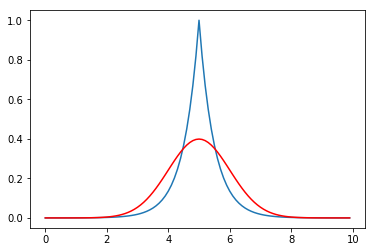

In [42]:
# 1. Importance sampling to reduce variance of Monte Carlo estimates 
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

# Create data
x = [x/100 for x in range (0,1000,10)]
y = [math.exp(-2*abs(y-5)) for y in x] 
normal_density = [normal_distribution(y,5,1) for y in x]

# Plot; blue is the integrand red is the (uniform) distribution we sample from 
plt.plot(x,y)
plt.plot(x,normal_density, color="red")
plt.show()

By sampling from the red distribution (using knowledge of the shape of the integrand) importance sampling can be used to calculate the integral. To implement importance sampling the integrand is multiplied by $\frac{N(5,1)}{N(5,1)}$ yielding:
$$
\int^{10}_1 10 e^{−2|x − 5|} \frac{\frac{1}{10}}{\frac{1}{\sqrt{2\sigma}}e^{-\frac{x-\mu}{2}}} \frac{1}{\sqrt{2\sigma}}e^{-\frac{x-\mu}{2}} dx
$$

From the integral above, samples are to be taken from the integral with $h(X)$ = $10 e^{−2|x − 5|}$ and $w(X)$ = $ \frac{\frac{1}{10}}{\frac{1}{\sqrt{2\sigma}}e^{-\frac{x-\mu}{2}}} $ where the samples X will now be drawn from $N(5,1)$, previously drawn from the uniform distribution. 



In [52]:
# Draw samples from normal distribution N(5,1)
normal_samples = np.random.normal(5,1,1000)
w_x = lambda x: uniform(1,10).pdf(x)/normal_distribution(x,5,1)
f_x = lambda x: 10 * math.exp(-2*abs(x-5))

output = [f_x(x) * w_x(x) for x in normal_samples]

# w_x(normal_samples)
# f_x(normal_samples)
print("Monte Carlo estimate for integral using importance sampling: mean = {0}, variance = {1}".format(np.mean(output), np.var(output)))


Monte Carlo estimate for integral using importance sampling: mean = 0.9988537197142375, variance = 0.3534697296044245


In [45]:
uniform(1,10).pdf(5)

0.10000000000000001